In [24]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon

import matplotlib.pyplot as plt
%matplotlib inline

import calendar

import folium
from folium import plugins

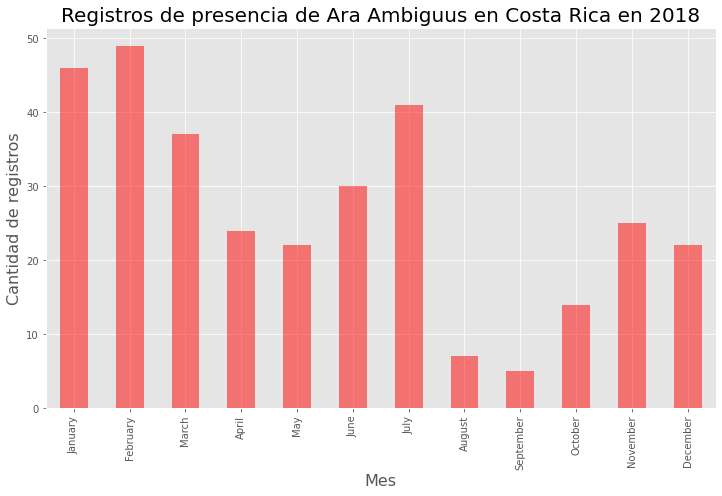

In [25]:
archivo_datos = "ara-ambiguus-cr.csv"
nombre_cientifico = "Ara Ambiguus"  
pd.options.display.max_rows = 12

registros_presencia_df = pd.read_csv(archivo_datos, sep='\t')
registros_presencia_df
registros_presencia_df["eventDate"] = pd.to_datetime(registros_presencia_df["eventDate"])
   
    
#Un gráfico de barras que muestre la cantidad de registros por mes.
plt.style.use('ggplot')
registros_x_mes = registros_presencia_df.groupby(registros_presencia_df['eventDate'].dt.month).count().eventDate
registros_x_mes

registros_x_mes.index=[calendar.month_name[x] for x in range(1,13)]
registros_x_mes

registros_x_mes.plot(kind='bar',figsize=(12,7), color='red', alpha=0.5)

plt.title('Registros de presencia de ' + nombre_cientifico + ' en Costa Rica en 2018', fontsize=20)
plt.xlabel('Mes', fontsize=16)
plt.ylabel('Cantidad de registros', fontsize=16);
  


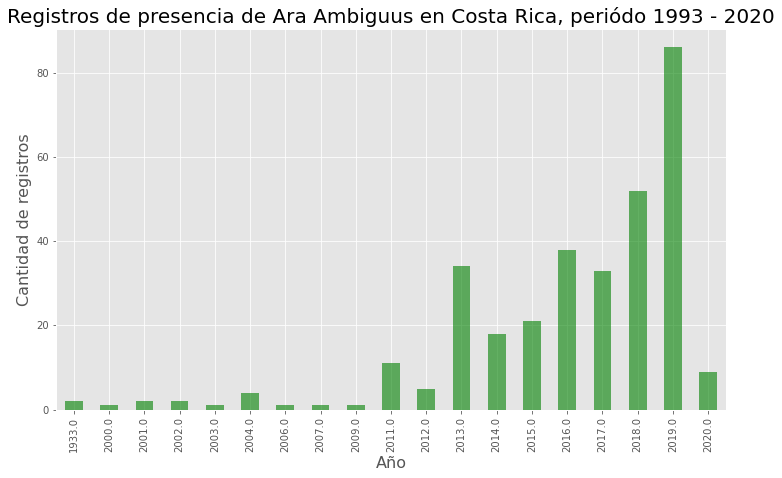

In [75]:
#Un gráfico de barras que muestre la cantidad de registros por año.
plt.style.use('ggplot')

registros_x_año = registros_presencia_df.groupby(registros_presencia_df['eventDate'].dt.year).count().eventDate
registros_x_año

registros_x_año.plot(kind='bar',figsize=(12,7), color='green', alpha=0.6)

plt.title('Registros de presencia de ' + nombre_cientifico + ' en Costa Rica, periódo 1993 - 2020', fontsize=20)
plt.xlabel('Año', fontsize=16)
plt.ylabel('Cantidad de registros', fontsize=16);

In [61]:
registros_presencia_geom = [Point(xy) for xy in zip(registros_presencia_df["decimalLongitude"], registros_presencia_df["decimalLatitude"])]
registros_presencia_gdf=gpd.GeoDataFrame(registros_presencia_df, crs={"init": "epsg:4326"}, geometry=registros_presencia_geom)

C:\Users\XPC\anaconda3\envs\tarea4\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [71]:
#Un mapa Folium que muestre cada uno de los registros de presencia de la especie.

registros_presencia_mapa = folium.Map(location=[10, -84], zoom_start=7, control_scale=True)
registros_presencia_mapa

folium.TileLayer(tiles='http://services.arcgisonline.com/arcgis/rest/services/World_Imagery/MapServer/MapServer/tile/{z}/{y}/{x}', 
attr='ESRI World Imagery', name='Satelital').add_to(registros_presencia_mapa)    

for lat, lng, label in zip(registros_presencia_df.decimalLatitude, registros_presencia_df.decimalLongitude, registros_presencia_df.eventDate.astype(str)):
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        color='red',
        fill=True,
        popup=label,
        fill_color='white',
        fill_opacity=0.6
    ).add_to(registros_presencia_mapa)

folium.LayerControl().add_to(registros_presencia_mapa) 

registros_presencia_mapa

   


In [63]:
#Un mapa Folium que muestre cada uno de los registros de presencia de la especie agrupados.

registros_presencia_mapa = folium.Map(location=[10, -84], zoom_start=7, control_scale=True)
registros_presencia_mapa

registros_presencia_cluster = plugins.MarkerCluster(name='Agrupamiento de especies').add_to(registros_presencia_mapa)

folium.TileLayer(tiles='http://services.arcgisonline.com/arcgis/rest/services/World_Imagery/MapServer/MapServer/tile/{z}/{y}/{x}', 
attr='ESRI World Imagery', name='Satelital').add_to(registros_presencia_mapa)

for lat, lng, label in zip(registros_presencia_df.decimalLatitude, registros_presencia_df.decimalLongitude, registros_presencia_df.eventDate.astype(str)):
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        color='red',
        fill=True,
        popup=label,
        fill_color='white',
        fill_opacity=0.6,
    ).add_to(registros_presencia_cluster)

folium.LayerControl().add_to(registros_presencia_mapa)    

registros_presencia_mapa